$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\vx}{\vec{x}}
\newcommand{\I}{\mathbb{I}}
$


<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# Lecture 20: Clustering, Information Theory, Exponential Families

Naveen Kodali and Jacob Abernethy
*Date:  Thursday, November 8, 2018*

## Outline

- Exponential Families
- Entropy and KL divergence
- K-means clustering


### Exponential Family:  Definition

**INTUITION**: $p()$ has **exp family form** when density $p(x | \theta)$ can be written as $$\exp(\text{Linear combination of }\theta\text{ and features of }x)$$



**DEF:** $p(x | \theta)$ has **exponential family form** if:
$$
\begin{align}
p(x | \theta)
&= \frac{1}{Z(\theta)} \exp\left[ \eta(\theta)^T \phi(x) \right] \\
&= \exp\left[ \eta(\theta)^T \phi(x) - A(\theta) \right]
\end{align}
$$


- $Z(\theta)$ is the **partition function** for normalization
- $A(\theta) = \log Z(\theta)$ is the **log partition function**
- $\phi(x) \in \R^d$ is a vector of **sufficient statistics**
- $\eta(\theta)$ maps $\theta$ to a set of **natural parameters**

### Example:  Bernoulli

The Bernoulli distribution can be written as
$$
\begin{align}
\mathrm{Ber}(x | \mu)
&= \mu^x (1-\mu)^{1-x} \\
&= \exp\left[ x \log \mu + (1-x) \log (1-\mu) \right] \\
&= \exp\left[ \eta(\mu)^T \phi(x) \right]
\end{align}
$$

where $\eta(\mu) = (\log\mu, \log(1-\mu))$ and $\phi(x) = (x, 1-x)$
- There is a linear dependence between features $\phi(x)$
- This representation is **overcomplete**
- $\eta$ is not uniquely determined

### Example:  Bernoulli

Instead, we can find a **minimal** parameterization:
$$
\begin{align}
\mathrm{Ber}(x | \mu) 
&= (1-\mu) \exp\left[ x \log\frac{\mu}{1-\mu} \right]
\end{align}
$$

This gives **natural parameters** $\eta = \log \frac{\mu}{1-\mu}$.
- Now, $\eta$ is unique

## Problem: Guassian Exponential Family

It turns out that the Gaussian distribution can be written in exponential family form. It is *usually* written as 
$$P_{\mu, \sigma^2}(x) := \frac{1}{\sqrt{2 \pi}\sigma} \exp(-(x-\mu)^2/(2\sigma^2))$$
How can you write it in exp family form?
$$
P_{\mu, \sigma^2}(x) = \exp\left[ \eta(\mu,\sigma^2)^T \phi(x) - A(\mu,\sigma) \right]
$$
Don't worry about normalization!

## Information Theory

> Uses material from **[MLAPP]** §2.8, **[Pierce 1980]**, **[Stone 2015]**, and **[Shannon 1951]**.

### Information Theory

- Information theory is concerned with
    - **Compression:**  Representing data in a compact fashion
    - **Error Correction:**  Transmitting and storing data in a way that is robust to errors

- In machine learning, information-theoretic quantities are useful for
    - manipulating probability distributions
    - interpreting statistical learning algorithms

### What is Information?

- Can we measure the amount of **information** we gain from an observation?
    - Information is measured in *bits* ( don't confuse with *binary digits*, $0110001\dots$ )
    - Intuitively, observing a fair coin flip should give 1 bit of information
    - Observing two fair coins should give 2 bits, and so on...

### Information:  Definition

- The **information content** of an event $E$ with probability $p$ defined as
    $$
    I(E) = I(p) = - \log_2 p = \log_2 \frac{1}{p} \geq 0
    $$

    - Information theory is about *probabilities* and *distributions*
    - The "meaning" of events doesn't matter.
    - Using bases other than 2 yields different units (Hartleys, nats, ...)

### Information Example:  Fair Coin—$P(\text{Head})=0.5$

- **One Coin:**  If we observe one head, then
    $$
    I(\text{Head}) = - \log_2 P(\text{Head}) = 1 \;\mathrm{bit}
    $$

- **Two Coins:** If we observe two heads in a row, 
    $$
    \begin{align}
    I(\text{Head},\text{Head})
    &= -\log_2 P(\text{Head}, \text{Head}) \\
    &= -\log_2 P(\text{Head})P(\text{Head}) \\
    &= -\log_2 P(\text{Head}) - \log_2 P(\text{Head}) = 2 \;\mathrm{bits}
    \end{align}
    $$

### Information Example:  Unfair Coin

- Suppose the coin has two heads, so $P(\text{Head})=1$.  Then,
    $$
    I(\text{Head}) = - \log_2 1 = 0
    $$
    - We will gain no information!
- On the contrary, if we observe tail
    $$
    I(\text{Tail}) = - \log_2 0 = + \infty
    $$
    - We will gain *infinite* information because we observe an impossible thing!

- Information is a measure of how **surprised** we are by an outcome.


### Entropy:  Definition

- The **entropy** of a discrete random variable $X$ with distribution $p$ is
    $$
    H[X] = E[I(p(X))] = - \sum_{x \in X} p(x) \log p(x)
    $$    
    - Entropy is the expected information received when we sample from $X$.
    - Entropy measures how *surprised* we are on average
    - When $X$ is continuous random variable, summation is replaced with integral

### Entropy:  Coin Flip

- If $X$ is binary, entropy is
    $$
    H[X] = -p \log p + (1-p) \log (1-p)
    $$
    
<center>
<div class="image"   style="width:551px">
    <img src="images/Entropy_Plot.png">
</div>
</center>

- Entropy is highest when $X$ is close to uniform.
    - Large entropy $\iff$ high uncertainty, more information from each new observation
    - Small entropy $\iff$ more knowledge about possible outcomes

- The farther from uniform $X$ is, the smaller the entropy.

### Entropy and Encoding: Communication Channel

- Now let's see how entropy is related to encoding theory
- **Communication channel** can be characterized as:
    - **[Source]** generates messages.
    - **[Encoder]** converts the message to a **signal** for transmission.
    - **[Channel]** is the path along which signals are transmitted, possibly under the influence of **noise**.
    - **[Decoder[** attempts to reconstruct the original message from the transmitted signal.
    - **[Destination]** is the intended recipient.
<center>
<div class="image"   style="width:700px">
    <img src="images/communication.jpg">
</div>
</center>    

### Entropy and Encoding: Encoding

- Suppose we draw messages from a distribution $p$.
    - Certain messages may be more likely than others.
    - For example, the letter **e** is most frequent in English

- An **efficient** encoding minimizes the average code length,
    - assign *short* codewords to common messages
    - and *longer* codewords to rare messages
    
- Example: **Morse Code**
<center>
<div class="image"   style="width:450px">
    <img src="images/morse-code.jpg">
</div>
</center>

### Entropy and Encoding: Source Coding Theorem

- Claude Shannon proved that for discrete noiseless channels:

> It is impossible to encode messages drawn from a distribution $p$ with fewer than $H[p]$ bits, on average.

- Here, *bits* refers to *binary digits*, i.e. encoding messages in binary.

> $H[p]$ measures the optimal code length, in bits, for messages drawn from $p$

### Cross Entropy & Relative Entropy

- Consider different distributions $p$ and $q$
    - What if we use a code optimal for $q$ to encode messages from $p$?

- For example, suppose our encoding scheme is optimal for German text.
    - What if we send English messages instead?
    - Certainly, there will be some waste due to different letter frequencies, umlauts, ...

### Cross Entropy & Relative Entropy

- **Cross entropy** measures the average number of bits needed to encode messages drawn from $p$ when we use a code optimal for $q$:
    $$
    H(p,q) = -\sum_{x \in \X} p(x) \log q(x)
    = - E_p[\log q(x)]
    $$

- Intuitively, $H(p,q) \geq H(p)$.  

- **Relative entropy** is the difference $H(p,q) - H(p)$.

- Relative entropy, aka **Kullback-Leibler divergence**, of $q$ from $p$ is
    $$
    \begin{align}
    D_{KL}(p \| q)
    &= H(p,q) - H(p) \\
    &= \sum_{x \in X} p(x) \log \frac{p(x)}{q(x)} \\
    \end{align}
    $$

> Measures the number of *extra* bits needed to encode messages from $p$ if we use a code optimal for $q$.

## K-Means Clustering 

### K-Means Clustering: The standard view

The **K-Means** algorithm takes a simple, non-probabilistic approach.
- First, pick random cluster centers $\mu_k$.

Then, repeat until convergence:

<div style="margin:10px; padding: 10px; border: 2px solid black">
**E-Step:** Assign $x_j$ to the nearest cluster center $\mu_k$,
$$
z_j = \arg\min_k || x_j - \mu_k ||^2
$$

**M-Step:** Re-estimate cluster centers by averaging over assignments:
$$
\mu_k = \frac{1}{ \# \{ j \mid z_j =k \}} \sum_{j=1}^N x_j \mathbb{I}(z_j = k)
$$
</div>

### K-Means Clustering: Initialization

> Images taken from Bishop, **[PRML]**

<img src="images/kmeans-1.png">

### K-Means Clustering: E-Step

<img src="images/kmeans-2.png">

### K-Means Clustering: M-Step

<img src="images/kmeans-3.png">

### K-Means Clustering: E-Step

<img src="images/kmeans-4.png">

### K-Means Clustering: M-Step

<img src="images/kmeans-5.png">

### K-Means Clustering: E-Step

<img src="images/kmeans-6.png">

### K-Means Clustering: M-Step

<img src="images/kmeans-7.png">

### K-Means Clustering: E-Step

<img src="images/kmeans-8.png">

### K-Means Clustering: M-Step

<img src="images/kmeans-9.png">

### K-Means Clustering:  The "Optimization" View

*Exercise:* Show that the K-Means algorithm finds a local minimum of the **distortion measure**, given by
$$
J(\mu_1, \ldots, \mu_k; z_1, \ldots, z_N) = \sum_{j=1}^N \sum_{k=1}^K \mathbb{I}(z_j=k) || x_j - \mu_k ||^2
$$

## Exercise: Convince yourself that K-Means = Alternating Minimization

<div style="margin:10px; padding: 10px; border: 2px solid black">
**E-Step:**
$$
(z_1, \ldots, z_N) = \arg\min_{(z_1', \ldots, z_N')} J(\mu_1, \ldots, \mu_K; z_1', \ldots, z_N')
$$

**M-Step:**
$$
(\mu_1, \ldots, \mu_K) = \arg\min_{(\mu_1', \ldots, \mu_K')} J(\mu_1', \ldots, \mu_K'; z_1, \ldots, z_N)
$$

</div>

where
$$
J(\mu_1, \ldots, \mu_k; z_1, \ldots, z_N) = \sum_{j=1}^N \sum_{k=1}^K \mathbb{I}(z_j=k) || x_j - \mu_k ||^2
$$


## Let us try to implement K-means ourselves

First we'll load some data

In [1]:
# Setting up ---- dont worry about this part
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset  
data = pd.read_csv('xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


## What does this data look like?

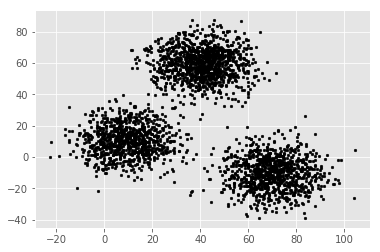

In [2]:
# Getting the values and plotting it ----- dont worry about this part
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

## First task: initialize the centroids

Pick some random points for the initial three centroids `C = [C[0,:], C[1,:], C[2,:]]`

In [ ]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 3
# Set X coordinates of random centroids and Y coordinates of random centroids
### TODO A: Implement this part to randomly initialize centroids ###
C_x = None
C_y = None
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

## Now implement the K-Means algorithm

You need to do two steps:
- (a) First implement the cluster assignments
- (b) 

In [ ]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        ### TODO B: Implement the clustering step or M-step ###
        clusters[i] = # this variable should be the rows of X for cluster i
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        ### TODO C: Implement the centroid computation step or E-step ###
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [6]:
## Solutions (please try out by yourself first):

#### TODO A:
## C_x = np.random.randint(0, np.max(X)-20, size=k)
## C_y = np.random.randint(0, np.max(X)-20, size=k)

#### TODO B:
## distances = dist(X[i], C)
## cluster = np.argmin(distances)
## clusters[i] = cluster

#### TODO C:
## points = [X[j] for j in range(len(X)) if clusters[j] == i]
## C[i] = np.mean(points, axis=0)

## CHALLENGE: Non-optimal K-means Solution

Can you augment the dataset given, and find an initialization of the K-Means algorithm, such that the final solution is *not* the best one?

It's not as easy as you think!
